# Домашнее задание

Прочитать про методы оптимизации для нейронных сетей https://habr.com/post/318970/  
Реализовать самостоятельно логистическую регрессию  
Обучить ее методом градиентного спуска  
Методом nesterov momentum  
Методом rmsprop  

## Дополнительное задание *  
В качестве dataset’а взять Iris, оставив 2 класса:  
Iris Versicolor  
Iris Virginica  

In [1]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# загружаем датасет про ирисы

iris = datasets.load_iris()

In [3]:
type(iris)

sklearn.utils.Bunch

In [4]:
for key in iris.keys():
    print( key )

data
target
frame
target_names
DESCR
feature_names
filename


In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
# формируем единый датафрейм с признаками и целевой переменной 'variety_num'

X = pd.DataFrame(data=iris.data, columns=iris.feature_names)
y = pd.DataFrame(data=iris.target, columns=['variety_num'])
data_iris = pd.concat([X, y], axis=1)

data_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),variety_num
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
data_iris['variety_num'].value_counts()

2    50
1    50
0    50
Name: variety_num, dtype: int64

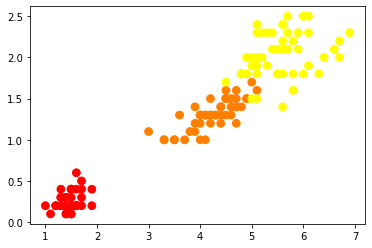

In [9]:
# строим график распределения классов цветков ириса

plt.scatter(data_iris['petal length (cm)'], data_iris['petal width (cm)'], c=data_iris.variety_num, cmap='autumn', s=60)
plt.show()

In [10]:
# исключаем класс Setosa, фильтруя датафрейм 

data_iris = data_iris.query('variety_num != 0')

In [11]:
# зададим марки классов для цветков, в правильной нумерации, 0 - versicolor, 1 - virginica

data_iris['variety_num'] = data_iris.variety_num.replace({1: 0, 2: 1})

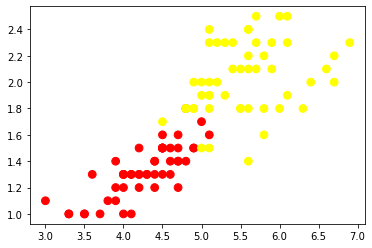

In [12]:
plt.scatter(data_iris['petal length (cm)'], data_iris['petal width (cm)'], c=data_iris.variety_num, cmap='autumn', s=60)
plt.show()

In [13]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'variety_num'] 
data_iris.columns = columns

In [14]:
data_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,variety_num
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0


## Реализация методом градиентного спуска

In [15]:
x1, x2, x3, x4, y = data_iris.sepal_length, data_iris.sepal_width, data_iris.petal_length, data_iris.petal_width, data_iris.variety_num
EPOCHS = 50 # количество эпох
LEARNING_RATE =  0.05 # скорость обучения / gamma

grad_costs = []
grad_preds = []
theta = np.random.normal(size=(5,))

for _ in range(EPOCHS):
    
    # Классифицирующая функция, пропущенная через сигмоиду
    predictions = theta[0] + theta[1] * x1 + theta[2] * x2 + theta[3] * x3 + theta[4] * x4
    grad_preds.append(predictions)
    sigmoid = 1. / (1 + np.exp(-predictions)) # функция логистической регрессии / сигмоид
    
    # находим градиент для каждой точки
    gradient_0 = LEARNING_RATE * np.sum(sigmoid - y) / len(predictions)
    gradient_1 = LEARNING_RATE * np.sum((sigmoid - y) * x1)/ len(predictions)
    gradient_2 = LEARNING_RATE * np.sum((sigmoid - y) * x2) / len(predictions)
    gradient_3 = LEARNING_RATE * np.sum((sigmoid - y) * x3) / len(predictions)
    gradient_4 = LEARNING_RATE * np.sum((sigmoid - y) * x4) / len(predictions)
    
    # находим новые точки (тетты)
    
    theta[0] = theta[0] - gradient_0
    theta[1] = theta[1] - gradient_1
    theta[2] = theta[2] - gradient_2
    theta[3] = theta[3] - gradient_3
    theta[4] = theta[4] - gradient_4
    
    cost = np.sum(((-y) * np.log(sigmoid)) - ((1 - y) * np.log(1 - sigmoid))) / len(predictions) # бинарная кросс-энтропия / функция потерь
    grad_costs.append(cost)
    
    if _ % 5 == 0:
        print(cost)
        
print('=====================================================================================================')    
print(theta[0], theta[1], theta[2], theta[3], theta[4])

1.1052910659397803
0.8415967409125706
0.8274588792712764
0.813676967225853
0.8002446113200675
0.7871552269278187
0.7744020644774315
0.7619782352259117
0.749876736388245
0.7380904754576175
-1.4518207891019146 0.4779470192912792 0.03619786079798947 -0.26244267197354376 -0.11969801014159057


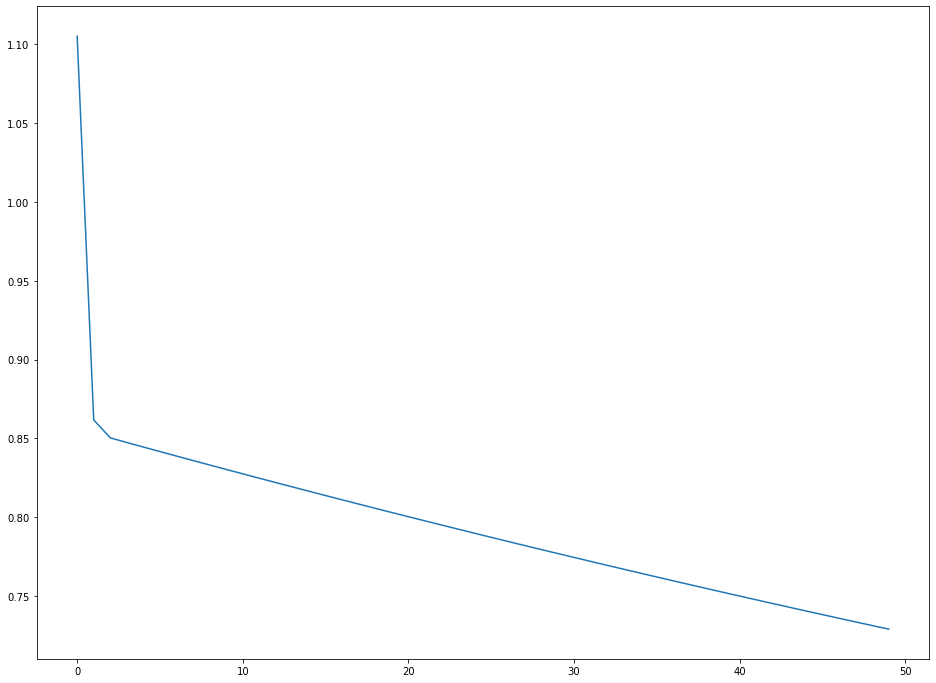

In [16]:
plt.figure(figsize=(16,12))
plt.plot(grad_costs)
plt.show();

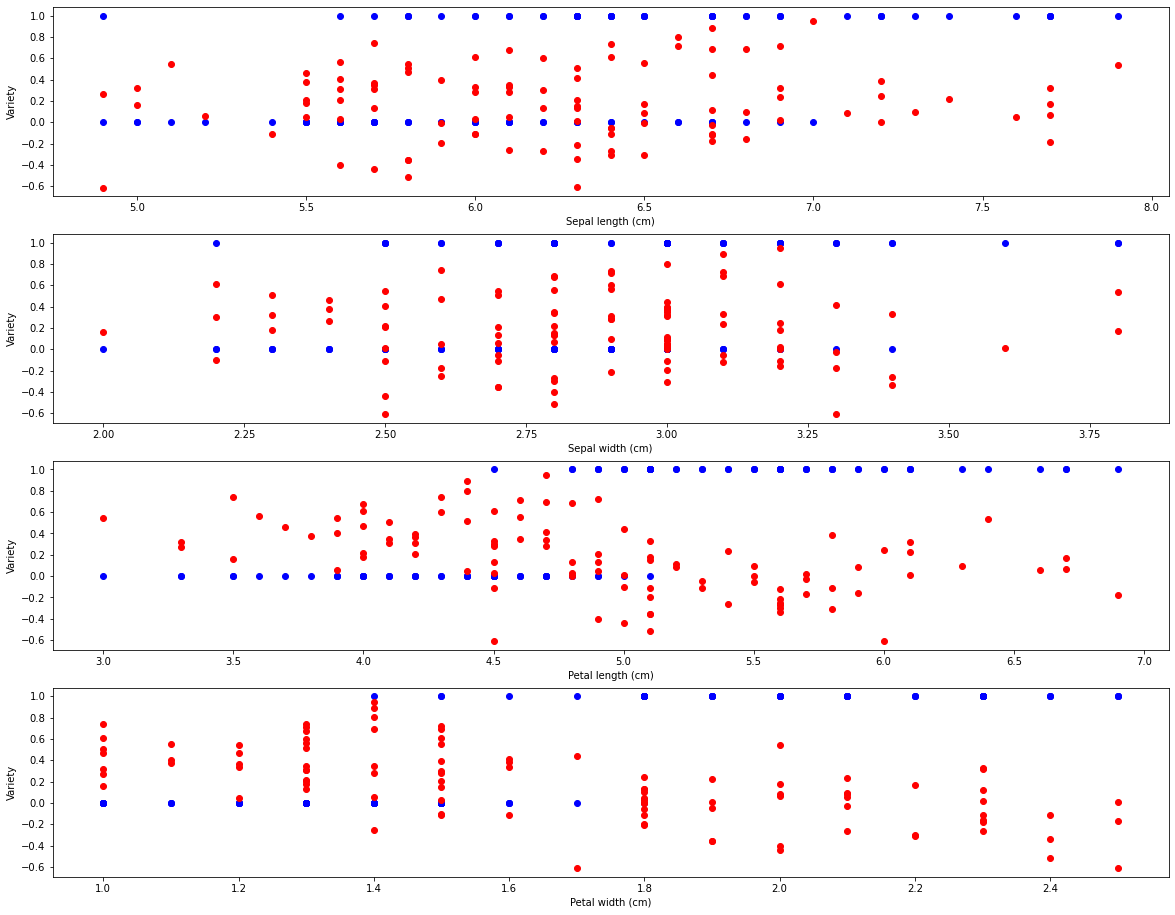

In [17]:
fig, ax = plt.subplots(4, figsize=(20, 16))

ax[0].scatter(x1, y, color='blue')
ax[0].scatter(x1, grad_preds[10], color='red')
ax[0].set_xlabel("Sepal length (cm)")
ax[0].set_ylabel("Variety")

ax[1].scatter(x2, y, color='blue')
ax[1].scatter(x2, grad_preds[10], color='red')
ax[1].set_xlabel("Sepal width (cm)")
ax[1].set_ylabel("Variety")

ax[2].scatter(x3, y, color='blue')
ax[2].scatter(x3, grad_preds[10], color='red')
ax[2].set_xlabel("Petal length (cm)")
ax[2].set_ylabel("Variety")

ax[3].scatter(x4, y, color='blue')
ax[3].scatter(x4, grad_preds[10], color='red')
ax[3].set_xlabel("Petal width (cm)")
ax[3].set_ylabel("Variety")

plt.show()

### Реализация методом nesterov momentum

In [18]:
x1, x2, x3, x4, y = data_iris.sepal_length, data_iris.sepal_width, data_iris.petal_length, data_iris.petal_width, data_iris.variety_num
EPOCHS = 50
LEARNING_RATE =  0.5
alpha = 0.8
exp_avg_0, exp_avg_1, exp_avg_2, exp_avg_3, exp_avg_4 = 0, 0, 0, 0, 0

nest_costs = []
nest_preds = []
theta = np.random.normal(size=(5,))

for _ in range(EPOCHS):
    nester_0 = theta[0] - (alpha * exp_avg_0)
    nester_1 = theta[1] - (alpha * exp_avg_1)
    nester_2 = theta[2] - (alpha * exp_avg_2)
    nester_3 = theta[3] - (alpha * exp_avg_3)
    nester_4 = theta[4] - (alpha * exp_avg_4)
    predictions = nester_0 + nester_1 * x1 + nester_2 * x2 + nester_3 * x3 + nester_4 * x4
    nest_preds.append(predictions)
    
    sigmoid = 1. / (1 + np.exp(-predictions))
    cost = np.sum(((-y) * np.log(sigmoid)) - ((1 - y) * np.log(1 - sigmoid))) / len(predictions)
    nest_costs.append(cost)

    # находим новые точки (тетты)
    
    exp_avg_0 = (alpha * exp_avg_0) + (LEARNING_RATE*(1-alpha)) * np.sum(sigmoid - y) / len(predictions)
    exp_avg_1 = (alpha * exp_avg_1) + (LEARNING_RATE*(1-alpha)) * np.sum(x1 * (sigmoid - y)) / len(predictions)
    exp_avg_2 = (alpha * exp_avg_2) + (LEARNING_RATE*(1-alpha)) * np.sum(x2 * (sigmoid - y)) / len(predictions)
    exp_avg_3 = (alpha * exp_avg_3) + (LEARNING_RATE*(1-alpha)) * np.sum(x3 * (sigmoid - y)) / len(predictions)
    exp_avg_4 = (alpha * exp_avg_4) + (LEARNING_RATE*(1-alpha)) * np.sum(x4 * (sigmoid - y)) / len(predictions)
    
    
    theta[0] -= exp_avg_0
    theta[1] -= exp_avg_1
    theta[2] -= exp_avg_2
    theta[3] -= exp_avg_3
    theta[4] -= exp_avg_4
    
    if _ % 10 == 0:
        print(cost)

print('=====================================================================================================')   
print(theta[0], theta[1], theta[2], theta[3], theta[4])

6.3384369587574065
1.0887017631159452
0.8290579298597562
0.5483241694849232
0.3345471977426942
-0.792020853485786 -1.4186578618627865 -1.0952564912527272 2.084902494868095 1.6128105775787902


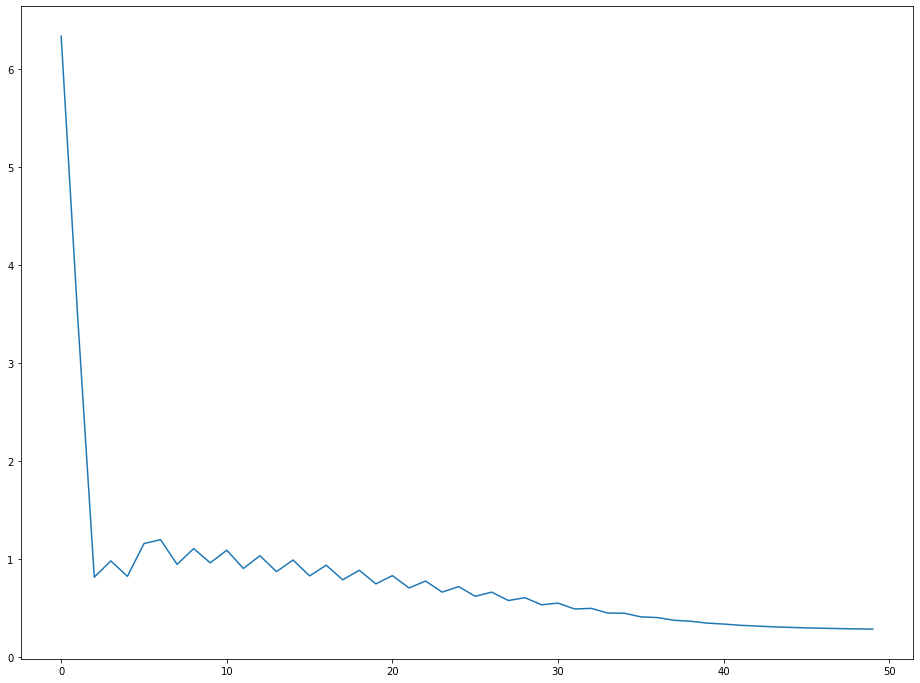

In [19]:
plt.figure(figsize=(16,12))
plt.plot(nest_costs)
plt.show();

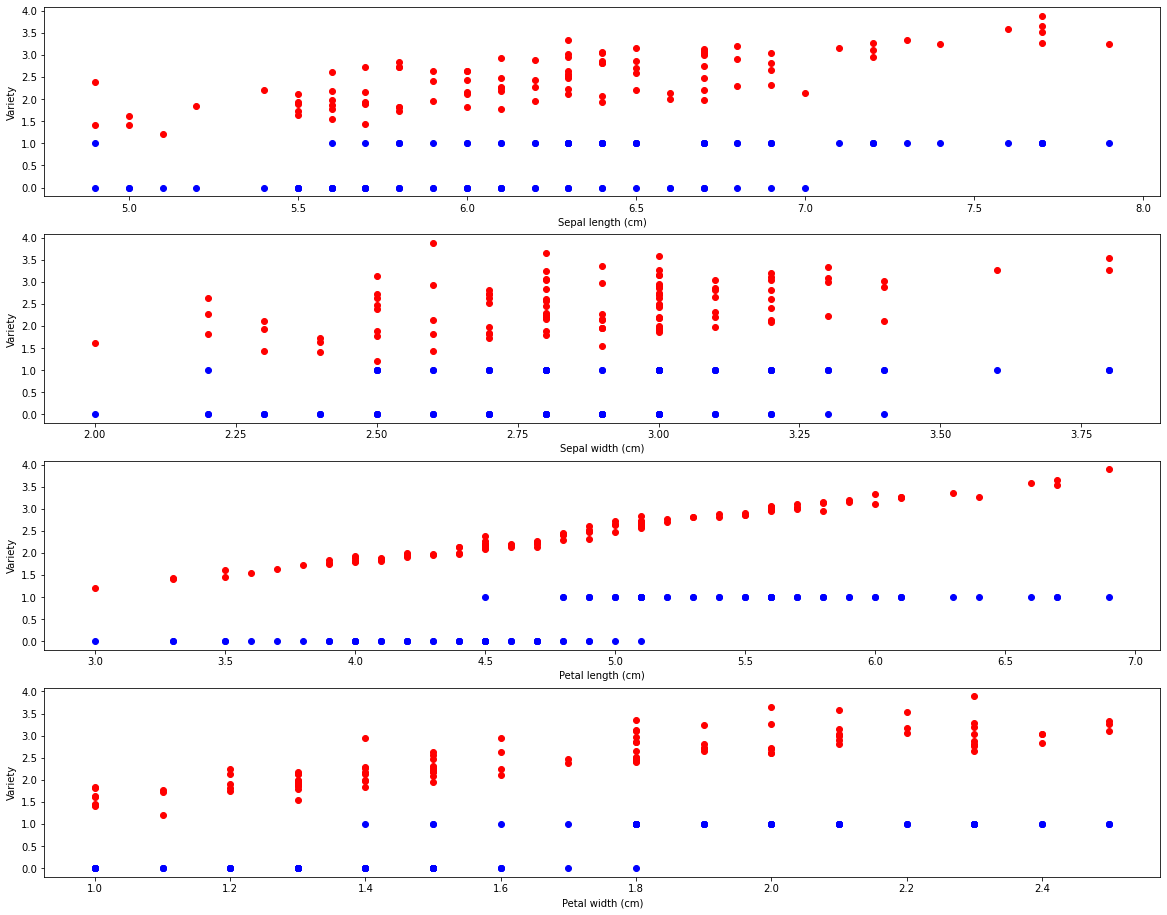

In [20]:
fig, ax = plt.subplots(4, figsize=(20, 16))

ax[0].scatter(x1, y, color='blue')
ax[0].scatter(x1, nest_preds[10], color='red')
ax[0].set_xlabel("Sepal length (cm)")
ax[0].set_ylabel("Variety")

ax[1].scatter(x2, y, color='blue')
ax[1].scatter(x2, nest_preds[10], color='red')
ax[1].set_xlabel("Sepal width (cm)")
ax[1].set_ylabel("Variety")

ax[2].scatter(x3, y, color='blue')
ax[2].scatter(x3, nest_preds[10], color='red')
ax[2].set_xlabel("Petal length (cm)")
ax[2].set_ylabel("Variety")

ax[3].scatter(x4, y, color='blue')
ax[3].scatter(x4, nest_preds[10], color='red')
ax[3].set_xlabel("Petal width (cm)")
ax[3].set_ylabel("Variety")

plt.show()

### Реализация методом rmsprop

In [21]:
x1, x2, x3, x4, y = data_iris.sepal_length, data_iris.sepal_width, data_iris.petal_length, data_iris.petal_width, data_iris.variety_num
EPOCHS = 50
LEARNING_RATE =  0.05
alpha = 0.7
exp_avg_0, exp_avg_1, exp_avg_2, exp_avg_3, exp_avg_4 = 0, 0, 0, 0, 0
eps = 1

rmsp_costs = []
rmsp_preds = []
theta = np.random.normal(size=(5,))

for _ in range(EPOCHS):
    
    predictions = theta[0] + theta[1] * x1 + theta[2] * x2 + theta[3] * x3 + theta[4] * x4
    rmsp_preds.append(predictions)
    
    sigmoid = 1. / (1 + np.exp(-predictions))
    cost = np.sum(((-y) * np.log(sigmoid)) - ((1 - y) * np.log(1 - sigmoid))) / len(predictions)
    rmsp_costs.append(cost)

        # находим новые точки (тетты)
    
    exp_avg_0 = (alpha * exp_avg_0) + (LEARNING_RATE*(1-alpha)) * ((np.sum(sigmoid - y) / len(predictions))**2)
    exp_avg_1 = (alpha * exp_avg_1) + (LEARNING_RATE*(1-alpha)) * ((np.sum(x1 * (sigmoid - y)) / len(predictions))**2)
    exp_avg_2 = (alpha * exp_avg_2) + (LEARNING_RATE*(1-alpha)) * ((np.sum(x2 * (sigmoid - y)) / len(predictions))**2)
    exp_avg_3 = (alpha * exp_avg_3) + (LEARNING_RATE*(1-alpha)) * ((np.sum(x3 * (sigmoid - y)) / len(predictions))**2)
    exp_avg_4 = (alpha * exp_avg_4) + (LEARNING_RATE*(1-alpha)) * ((np.sum(x4 * (sigmoid - y)) / len(predictions))**2)
    
    
    theta[0] -= (LEARNING_RATE / np.sqrt(exp_avg_0 + eps)) * (np.sum(sigmoid - y) / len(predictions))
    theta[1] -= (LEARNING_RATE / np.sqrt(exp_avg_1 + eps)) * (np.sum(x1 * (sigmoid - y)) / len(predictions))
    theta[2] -= (LEARNING_RATE / np.sqrt(exp_avg_2 + eps)) * (np.sum(x2 * (sigmoid - y)) / len(predictions))
    theta[3] -= (LEARNING_RATE / np.sqrt(exp_avg_3 + eps)) * (np.sum(x3 * (sigmoid - y)) / len(predictions))
    theta[4] -= (LEARNING_RATE / np.sqrt(exp_avg_4 + eps)) * (np.sum(x4 * (sigmoid - y)) / len(predictions))
    
    if _ % 5 == 0:
        print(cost)
    
print('=====================================================================================================')   
print(theta[0], theta[1], theta[2], theta[3], theta[4])

2.227766276791877
1.0447260873592077
1.0262383503713992
1.008056277354968
0.9902485859742111
0.9728265949156182
0.9557896227973586
0.9391346971526403
0.9228581732090624
0.9069560151681708
-0.5815045741391244 1.2609017727499923 -0.8188145311640781 -0.9308996925840493 -0.12134329177153477


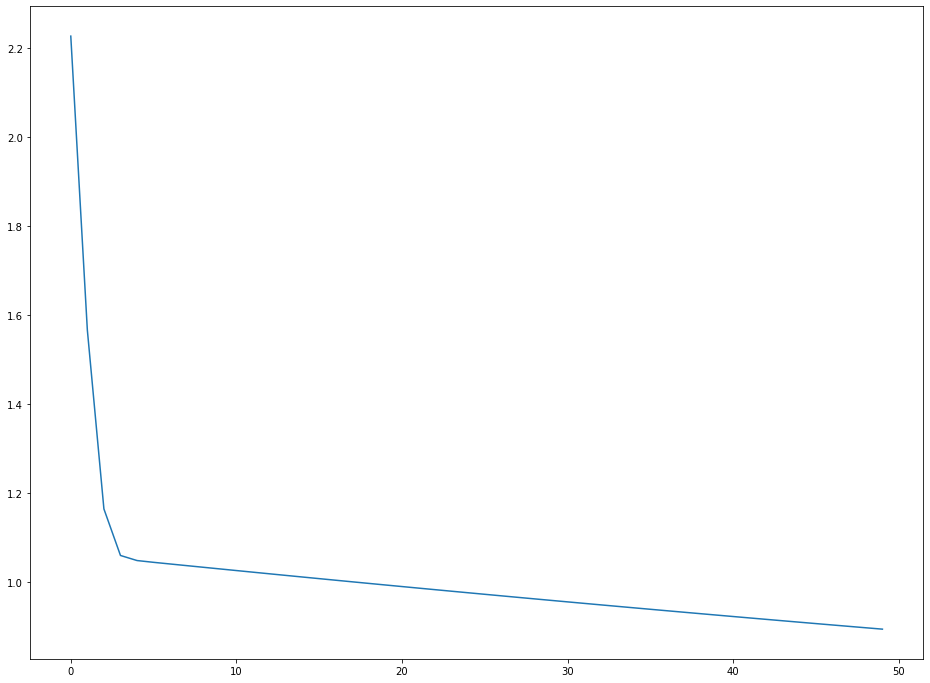

In [22]:
plt.figure(figsize=(16,12))
plt.plot(rmsp_costs)
plt.show();

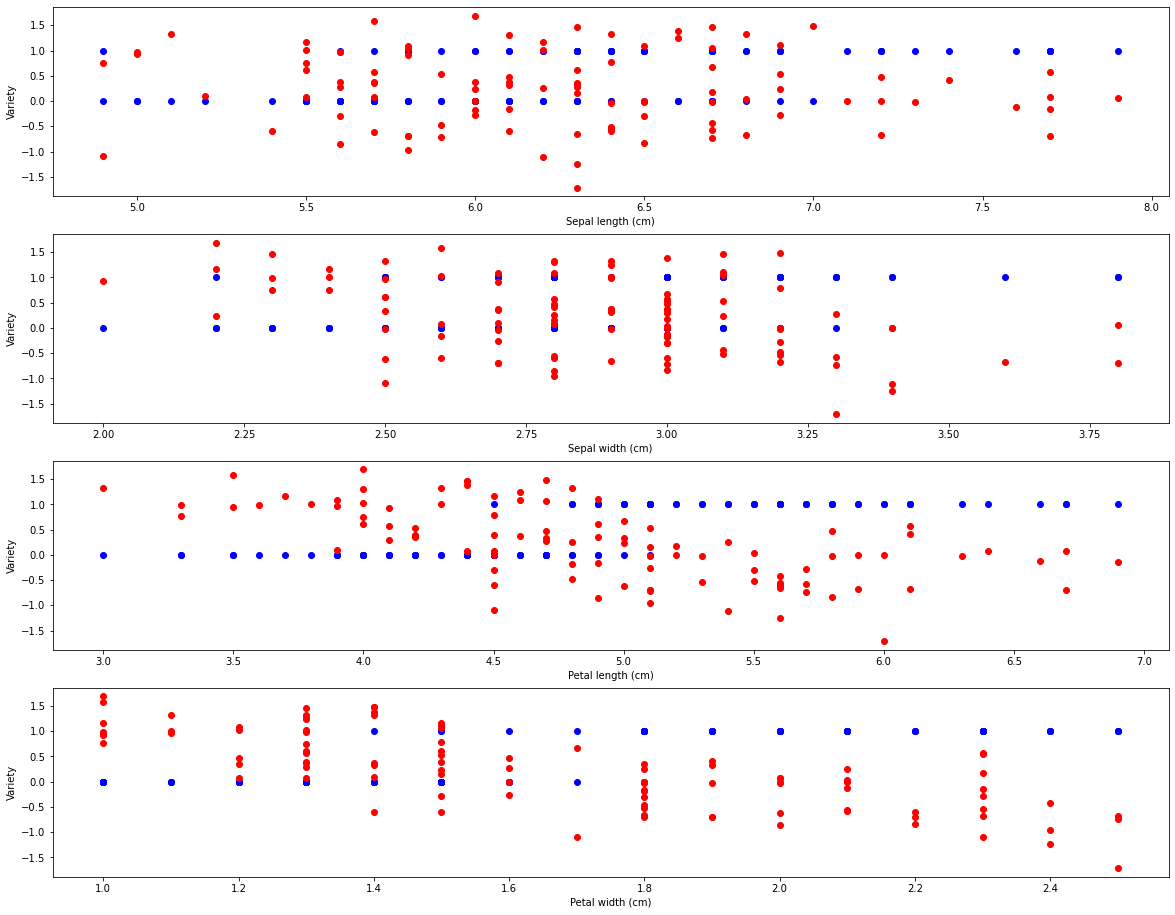

In [23]:
fig, ax = plt.subplots(4, figsize=(20, 16))

ax[0].scatter(x1, y, color='blue')
ax[0].scatter(x1, rmsp_preds[10], color='red')
ax[0].set_xlabel("Sepal length (cm)")
ax[0].set_ylabel("Variety")

ax[1].scatter(x2, y, color='blue')
ax[1].scatter(x2, rmsp_preds[10], color='red')
ax[1].set_xlabel("Sepal width (cm)")
ax[1].set_ylabel("Variety")

ax[2].scatter(x3, y, color='blue')
ax[2].scatter(x3, rmsp_preds[10], color='red')
ax[2].set_xlabel("Petal length (cm)")
ax[2].set_ylabel("Variety")

ax[3].scatter(x4, y, color='blue')
ax[3].scatter(x4, rmsp_preds[10], color='red')
ax[3].set_xlabel("Petal width (cm)")
ax[3].set_ylabel("Variety")

plt.show()

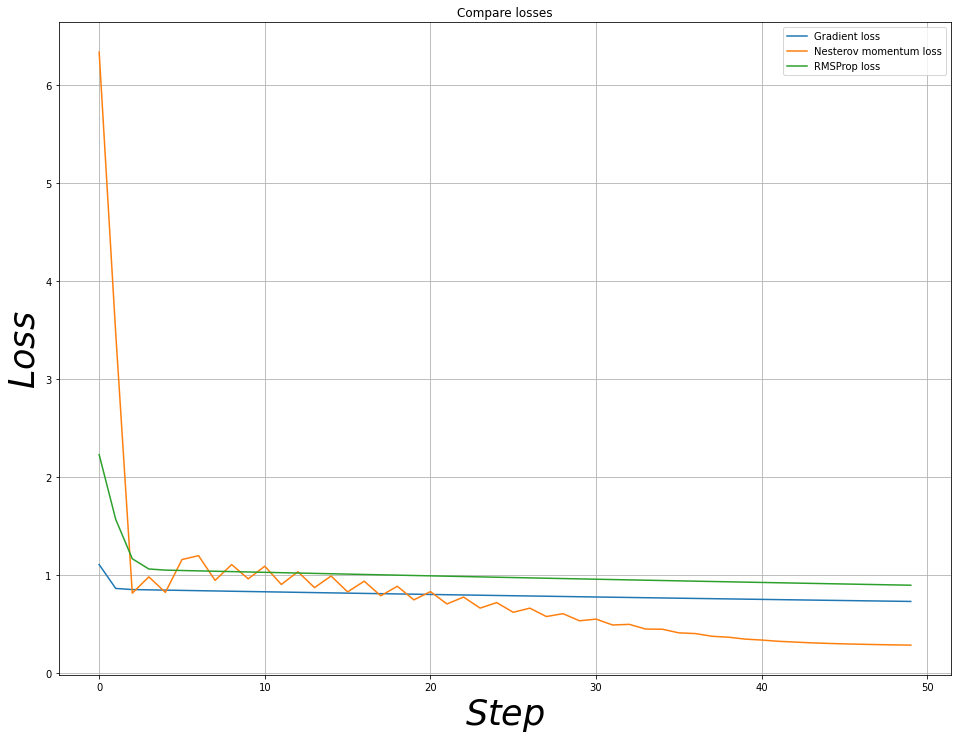

In [24]:
# Сравним скорость убывания ошибки

plt.figure(figsize=(16,12), edgecolor = 'black')
plt.plot(range(50), grad_costs, label='Gradient loss' )
plt.plot(range(50), nest_costs, label='Nesterov momentum loss' )
plt.plot(range(50), rmsp_costs, label='RMSProp loss' )
plt.title('Compare losses')
plt.xlabel('$Step$', fontsize=35)
plt.ylabel('$Loss$', fontsize=35)
plt.legend()
plt.grid()
plt.show()

Полезные ссылки:

https://ru.wikipedia.org/wiki/Логистическая_регрессия